# Week 6 Assignments

## Assignment 6.1

In [6]:
from keras.datasets import mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
# prepping data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [9]:
# prepping labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
# create model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 12s 8ms/step - loss: 0.1723 - accuracy: 0.9465
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0475 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0323 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0245 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0196 - accuracy: 0.9939


In [13]:
model.save("C:/Users/Stewart/Documents/GitHub\dsc650/dsc650/assignments/assignment06/results/6.1")

INFO:tensorflow:Assets written to: C:/Users/Stewart/Documents/GitHub\dsc650/dsc650/assignments/assignment06/results/6.1\assets


INFO:tensorflow:Assets written to: C:/Users/Stewart/Documents/GitHub\dsc650/dsc650/assignments/assignment06/results/6.1\assets


In [ ]:
# plotting model
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

## Assignment 6.2

### Assignment 6.2a

In [17]:
import keras
import tensorflow.keras.datasets
from keras import layers
from keras import models
from keras import optimizers
import ssl
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.optimizers import SGD
import scipy

In [18]:
ssl._create_default_https_context = ssl._create_unverified_context

In [19]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [20]:
# one hot encode target values
trainY = to_categorical(y_train)
testY = to_categorical(y_test)

In [21]:
# loading model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [22]:
# creating model 
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['acc'])

In [23]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test), batch_size =64)

Epoch 1/10
782/782 [==============================] - 6s 7ms/step - loss: 1.7827 - acc: 0.3684 - val_loss: 1.4893 - val_acc: 0.4607
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.2989 - acc: 0.5362 - val_loss: 1.2543 - val_acc: 0.5512
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1433 - acc: 0.5953 - val_loss: 1.1509 - val_acc: 0.5944
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 1.0325 - acc: 0.6372 - val_loss: 1.0786 - val_acc: 0.6310
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.9584 - acc: 0.6643 - val_loss: 1.0273 - val_acc: 0.6446
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8977 - acc: 0.6843 - val_loss: 1.0105 - val_acc: 0.6563
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.8385 - acc: 0.7085 - val_loss: 1.0161 - val_acc: 0.6525
Epoch 8/10
782/782 [==============================] - 5s 6ms/step - loss: 0.

In [24]:
model.save("C:/Users/Stewart/Documents/GitHub\dsc650/dsc650/assignments/assignment06/results/6.1a")

INFO:tensorflow:Assets written to: C:/Users/Stewart/Documents/GitHub\dsc650/dsc650/assignments/assignment06/results/6.1a\assets


INFO:tensorflow:Assets written to: C:/Users/Stewart/Documents/GitHub\dsc650/dsc650/assignments/assignment06/results/6.1a\assets


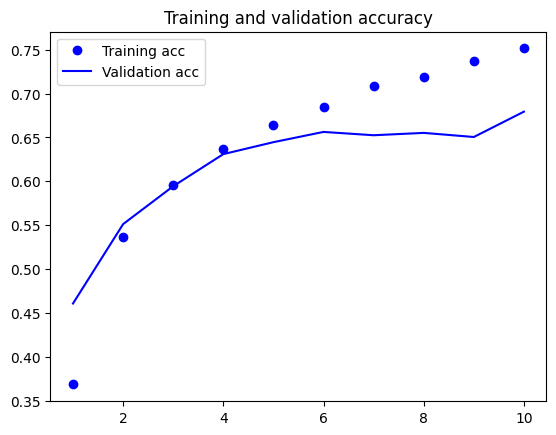

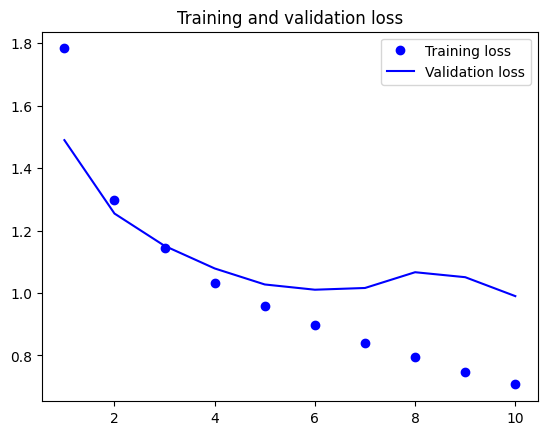

In [25]:
# plotting model
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Assignment 6.2b

In [26]:
import tensorflow as tf

In [27]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [28]:
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [29]:
def define_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(.5))
    model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [30]:
# categorical
trainY = to_categorical(y_train)
testY = to_categorical(y_test)

In [31]:
trainX, testX = prep_pixels(x_train, x_test)

In [32]:
# load model
model = define_model()

E:\Program Files (x86)\miniconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [33]:
# create generator to shift and rotate image
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

In [34]:
import scipy

In [35]:
# fit to datda
it_train = datagen.flow(trainX, trainY, batch_size=64)

In [37]:
# augmented model
steps = int(trainX.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=20,  validation_data=(testX, testY))

In [ ]:
model.save("C:/Users/Stewart/Documents/GitHub\dsc650/dsc650/assignments/assignment06/results/6.2b")

In [ ]:
# plotting model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig
plt.show()


## Assignment 6.3

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.callbacks import CSVLogger

In [ ]:
model = ResNet50(weights='imagenet')

In [ ]:
# set paths
path1 = 'C:/Users/Stewart/Documents/GitHub/dsc650/dsc650/assignments/assignment06/J_tree.jpg'
path2 = 'C:/Users/Stewart/Documents/GitHub/dsc650/dsc650/assignments/assignment06/family.jpg'
path3 = 'C:/Users/Stewart/Documents/GitHub/dsc650/dsc650/assignments/assignment06/el_cap.jpg'
path4 = 'C:/Users/Stewart/Documents/GitHub/dsc650/dsc650/assignments/assignment06/destiny.jpg'
path5 = 'C:/Users/Stewart/Documents/GitHub/dsc650/dsc650/assignments/assignment06/chicken.jpg'
path6 = 'C:/Users/Stewart/Documents/GitHub/dsc650/dsc650/assignments/assignment06/broccoli.jpg'
path7 = 'C:/Users/Stewart/Documents/GitHub/dsc650/dsc650/assignments/assignment06/academy.jpg'

In [ ]:
# load images
img1 = image.load_img(path1, target_size=(224,224))
img2 = image.load_img(path2, target_size=(224,224))
img3 = image.load_img(path3, target_size=(224,224))
img4 = image.load_img(path4, target_size=(224,224))
img5 = image.load_img(path5, target_size=(224,224))
img6 = image.load_img(path6, target_size=(224,224))
img7 = image.load_img(path7, target_size=(224,224))

In [ ]:
# process images
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)
x1 = preprocess_input(x1)

x2 = image.img_to_array(img2)
x2 = np.expand_dims(x2, axis=0)
x2 = preprocess_input(x2)

x3 = image.img_to_array(img3)
x3 = np.expand_dims(x3, axis=0)
x3 = preprocess_input(x3)

x4 = image.img_to_array(img4)
x4 = np.expand_dims(x4, axis=0)
x4 = preprocess_input(x4)

x5 = image.img_to_array(img5)
x5 = np.expand_dims(x5, axis=0)
x5 = preprocess_input(x5)

x6 = image.img_to_array(img6)
x6 = np.expand_dims(x6, axis=0)
x6 = preprocess_input(x6)

x7 = image.img_to_array(img7)
x7 = np.expand_dims(x7, axis=0)
x7 = preprocess_input(x7)

In [ ]:
# make list
img_lst = [x1, x2, x3, x4, x5, x6, x7]

In [ ]:
# predict with RESNET
preds = []
for img in img_lst:
    preds.append(model.predict(img))

In [ ]:
# print predictions, save to text file
for pred in preds:
    print('Predicted: ', decode_predictions(pred, top=3)[0])